In [1]:
import pathlib
import tensorflow as tf
from tensorflow.python.keras.models import Sequential

train_data_dir = "//Users/dianadragos/Downloads/places365_standard/sample/train/"
val_data_dir = "//Users/dianadragos/Downloads/places365_standard/sample/val/"

train_data_dir = pathlib.Path(train_data_dir)
val_data_dir = pathlib.Path(val_data_dir)

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 20 files belonging to 2 classes.
Found 30 files belonging to 3 classes.


In [2]:
train_class_names = train_ds.class_names
val_class_names = val_ds.class_names

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
from tensorflow.keras import layers
import numpy as np

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [39]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.6569 - accuracy: 0.0000e+00 - val_loss: 3.8879 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 1s 684ms/step - loss: 1.4964 - accuracy: 0.5000 - val_loss: 2.5842 - val_accuracy: 0.2333
Epoch 3/10
1/1 [==============================] - 0s 443ms/step - loss: 0.5727 - accuracy: 0.6500 - val_loss: 2.6706 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 1s 635ms/step - loss: 0.6629 - accuracy: 0.5000 - val_loss: 2.4441 - val_accuracy: 0.0333
Epoch 5/10
1/1 [==============================] - 1s 678ms/step - loss: 0.4331 - accuracy: 1.0000 - val_loss: 2.5217 - val_accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 432ms/step - loss: 0.3627 - accuracy: 1.0000 - val_loss: 2.7564 - val_accuracy:

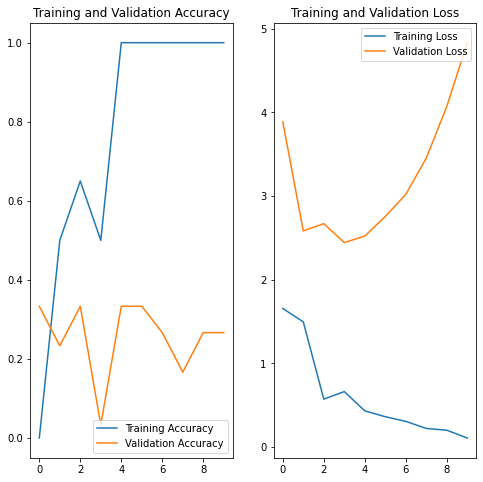

In [42]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
import os
import tensorflow as tf

for i, file_name in enumerate(os.walk('//Users/dianadragos/Downloads/places365_standard/train/')):
#     print(file_name[2])
    try:
        img = tf.io.read_file('//Users/dianadragos/Downloads/places365_standard/train/' +file_name[2][i])
        img = tf.image.decode_jpeg(img)
    except Exception as e:
        print('******************************************************')
        print('{} - broken'.format(file_name[0] + '/' + file_name[2][i]))

******************************************************
//Users/dianadragos/Downloads/places365_standard/train//.DS_Store - broken
******************************************************
//Users/dianadragos/Downloads/places365_standard/train/farm/00004882.jpg - broken
******************************************************
//Users/dianadragos/Downloads/places365_standard/train/archaelogical_excavation/00001722.jpg - broken
******************************************************
//Users/dianadragos/Downloads/places365_standard/train/bedroom/00001044.jpg - broken
******************************************************
//Users/dianadragos/Downloads/places365_standard/train/storage_room/00003653.jpg - broken
******************************************************
//Users/dianadragos/Downloads/places365_standard/train/archive/00002559.jpg - broken
******************************************************
//Users/dianadragos/Downloads/places365_standard/train/elevator_shaft/00003647.jpg - broken
****